In [6]:
from nilearn import datasets

yeo = datasets.fetch_atlas_yeo_2011()
print(
    "Yeo atlas nifti image (3D) with 17 parcels and liberal mask "
    f" is located at: {yeo['thick_17']}"
)

Yeo atlas nifti image (3D) with 17 parcels and liberal mask  is located at: /Users/yanis/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz


In [7]:
dataset = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm") 
atlas_filename = dataset.maps
labels = dataset.labels

In [8]:
data = datasets.fetch_development_fmri(n_subjects=10)

print(
    "Functional nifti images (4D, e.g., one subject) "
    f"are located at : {data.func[0]!r}"
)
print(
    "Counfound csv files (of same subject) are located "
    f"at : {data['confounds'][0]!r}"
)

Functional nifti images (4D, e.g., one subject) are located at : '/Users/yanis/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
Counfound csv files (of same subject) are located at : '/Users/yanis/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv'


In [14]:
data.func[0]

'/Users/yanis/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

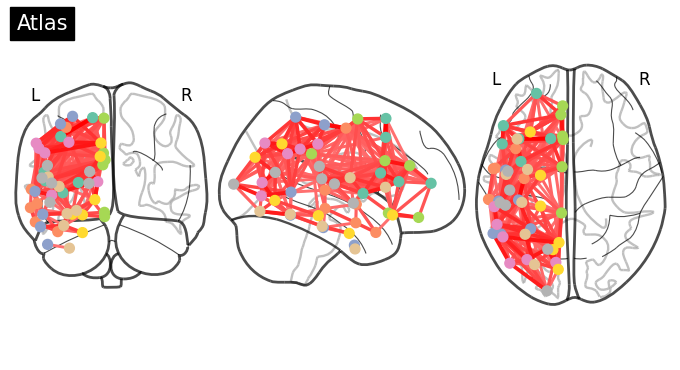

In [12]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import MultiNiftiLabelsMasker

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)

# useful for plotting connectivity interactions on glass brain
from nilearn import plotting

# create masker using MultiNiftiLabelsMasker to extract functional data within
# atlas parcels from multiple subjects using parallelization to speed up the
# computation
masker = MultiNiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    n_jobs=2,
)

# extract time series from all subjects
time_series = masker.fit_transform(data.func)

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(
    mean_correlation_matrix,
    coordinates,
    edge_threshold="80%",
    title="Atlas",
)